In [59]:
#%pip install --upgrade pip
# %pip install -q --upgrade jupyter
# %pip install -q pyts
# %pip install -q nbformat>=4.2.0
# %pip show -q ipython
# %pip show -q nbformat
# %pip install -q --upgrade plotly

# %pip install -q yfinance

In [60]:
from __future__ import print_function

import os
import sys
import glob
import time

import matplotlib.pyplot as plt
import numpy as np
from math import floor
import seaborn as sns

import pandas as pd
import yfinance as yf

## Import Financial Data

In [61]:
#close price time period
start_date = '2021-10-01'
#start_date = '2023-01-01'
end_date = '2023-12-01'

Sylicon Valley Bank Data

In [62]:
ticker = 'SIVBQ'
svb_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
print("index",svb_data.index)
print("num rows",svb_data.shape[0])
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
svb_data.dropna(how='any', inplace=True)
#print("Num rows for df Close col",len(dataset['Close'].dropna()))
print("Num rows for df Close col",len(svb_data['Close']))
print(svb_data.head())
#print(dataset.iloc[521],dataset.iloc[522],dataset.iloc[523])
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

[*********************100%%**********************]  1 of 1 completed

index DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14',
               ...
               '2023-10-19', '2023-10-23', '2023-10-26', '2023-11-01',
               '2023-11-07', '2023-11-13', '2023-11-16', '2023-11-22',
               '2023-11-24', '2023-11-29'],
              dtype='datetime64[ns]', name='Date', length=524, freq=None)
num rows 524
Num rows for df Close col 524
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2021-10-01  650.000000  669.570007  648.065002  664.530029  664.530029  281112
2021-10-04  663.989990  669.000000  645.729797  649.349976  649.349976  340741
2021-10-05  657.909973  669.174988  652.072571  665.380005  665.380005  358684
2021-10-06  654.039978  663.919983  643.219971  659.849976  659.849976  441251
2021-10-07  6

Graph to compare rebased prices with the S&P Financials index

[*********************100%%**********************]  1 of 1 completed


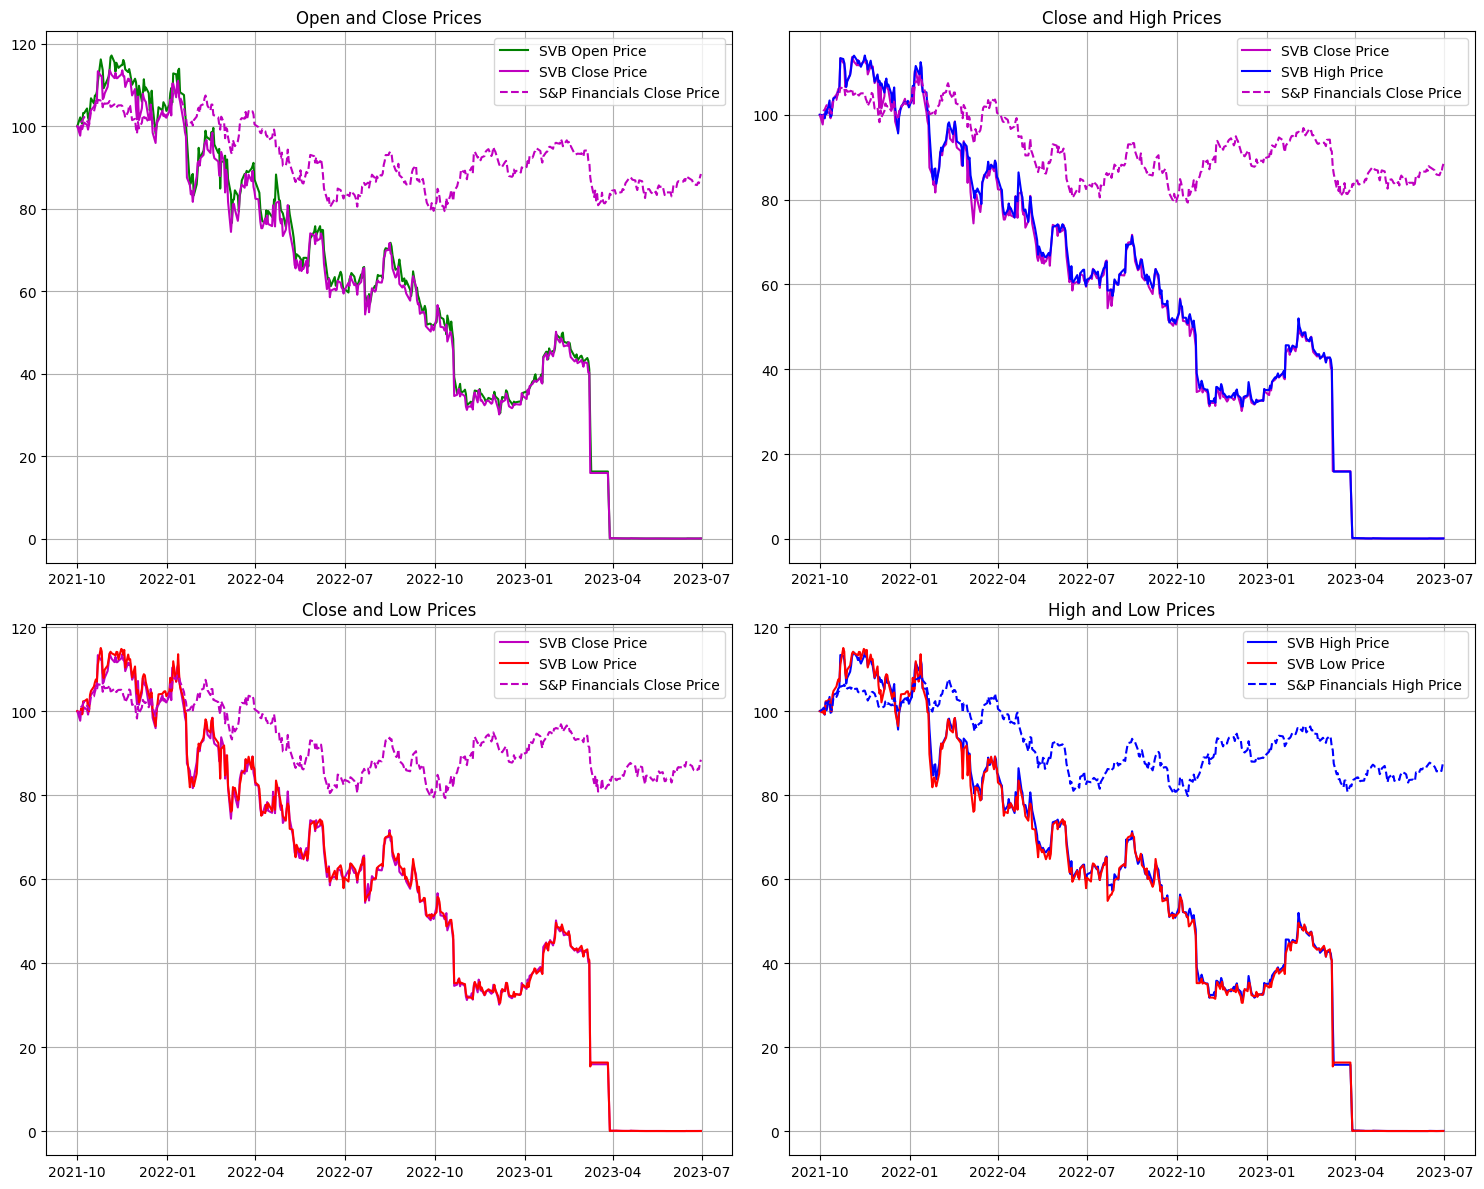

In [63]:
sp_financials_ticker = '^SP500-40'
sp_financials_data = yf.download(sp_financials_ticker, start=start_date, end=end_date, interval='1d')

# print("SVB num rows", dataset.shape[0])
# print("S&P Financials num rows", sp_financials_data.shape[0])
# print("SVB data head:\n", dataset.head())
# print("S&P Financials data head:\n", sp_financials_data.head())

sp_financials_data = sp_financials_data.dropna()

svb_data = svb_data[svb_data.index <= '2023-07-01']
sp_financials_data = sp_financials_data[sp_financials_data.index <= '2023-07-01']

#rebase
svb_rebased = svb_data / svb_data.iloc[0] * 100
sp_financials_rebased = sp_financials_data / sp_financials_data.iloc[0] * 100

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].plot(svb_rebased.index, svb_rebased['Open'], label='SVB Open Price', color='g')
axs[0, 0].plot(svb_rebased.index, svb_rebased['Close'], label='SVB Close Price', color='m')
axs[0, 0].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[0, 0].set_title('Open and Close Prices')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(svb_rebased.index, svb_rebased['Close'], label='SVB Close Price', color='m')
axs[0, 1].plot(svb_rebased.index, svb_rebased['High'], label='SVB High Price', color='b')
axs[0, 1].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[0, 1].set_title('Close and High Prices')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(svb_rebased.index, svb_rebased['Close'], label='SVB Close Price', color='m')
axs[1, 0].plot(svb_rebased.index, svb_rebased['Low'], label='SVB Low Price', color='r')
axs[1, 0].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[1, 0].set_title('Close and Low Prices')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(svb_rebased.index, svb_rebased['High'], label='SVB High Price', color='b')
axs[1, 1].plot(svb_rebased.index, svb_rebased['Low'], label='SVB Low Price', color='r')
axs[1, 1].plot(sp_financials_rebased.index, sp_financials_rebased['High'], label='S&P Financials High Price', color='b', linestyle='--')
axs[1, 1].set_title('High and Low Prices')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Correlation SVB Open versus Close / High versus Low

In [64]:
correlations = {}
column_1='Open'
column_2='Close'
correlation = svb_data[column_1].corr(svb_data[column_2])
print(f'Correlation between {column_1} and {column_2}: {correlation:.4f}')

correlations = {}
column_1='High'
column_2='Low'
correlation = svb_data[column_1].corr(svb_data[column_2])
print(f'Correlation between {column_1} and {column_2}: {correlation:.4f}')

Correlation between Open and Close: 0.9985
Correlation between High and Low: 0.9992


SVB Correlation Matrix

In [72]:
correlation_matrix = svb_data.corr(method='pearson')
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999548  0.999204  0.998542   0.998542 -0.233722
High       0.999548  1.000000  0.999246  0.999217   0.999217 -0.233988
Low        0.999204  0.999246  1.000000  0.999544   0.999544 -0.239849
Close      0.998542  0.999217  0.999544  1.000000   1.000000 -0.239637
Adj Close  0.998542  0.999217  0.999544  1.000000   1.000000 -0.239637
Volume    -0.233722 -0.233988 -0.239849 -0.239637  -0.239637  1.000000


Silvergate Capital Corporation Data

In [66]:
ticker = 'SICP'
sicp_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

print("num rows",sicp_data.shape[0])
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
sicp_data.dropna(how='any', inplace=True)
#print("Num rows for df Close col",len(dataset['Close'].dropna()))
print("Num rows for df Close col",len(sicp_data['Close']))
print(sicp_data.head())
#print(dataset.iloc[521],dataset.iloc[522],dataset.iloc[523])
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

[*********************100%%**********************]  1 of 1 completed

num rows 545
Num rows for df Close col 545
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-10-01  118.639999  128.309998  116.870003  128.050003  128.050003   
2021-10-04  128.199997  141.960007  121.059998  135.899994  135.899994   
2021-10-05  138.360001  154.600006  137.759995  153.000000  153.000000   
2021-10-06  155.520004  167.500000  144.000000  162.710007  162.710007   
2021-10-07  160.220001  168.600006  148.369995  151.720001  151.720001   

             Volume  
Date                 
2021-10-01  1201200  
2021-10-04  1813600  
2021-10-05  2394900  
2021-10-06  2536500  
2021-10-07  1856100  


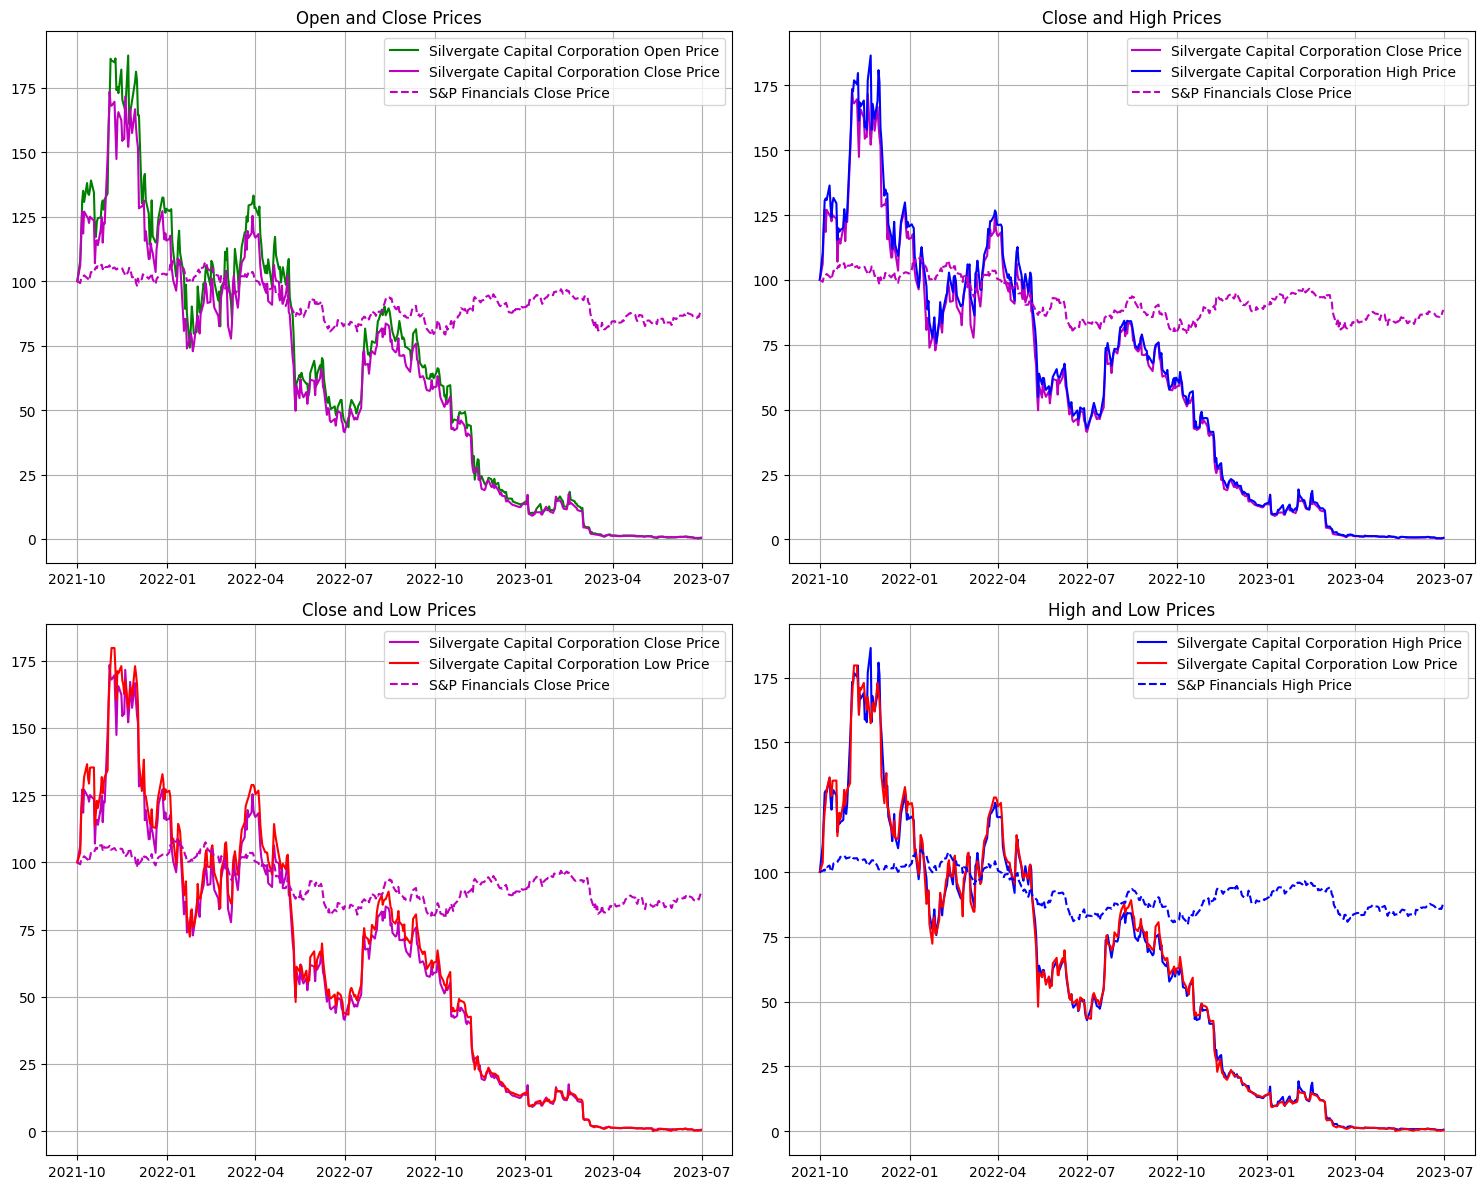

In [67]:
sicp_data = sicp_data[sicp_data.index <= '2023-07-01']

#rebase
sicp_rebased = sicp_data / sicp_data.iloc[0] * 100

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].plot(sicp_rebased.index, sicp_rebased['Open'], label='Silvergate Capital Corporation Open Price', color='g')
axs[0, 0].plot(sicp_rebased.index, sicp_rebased['Close'], label='Silvergate Capital Corporation Close Price', color='m')
axs[0, 0].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[0, 0].set_title('Open and Close Prices')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(sicp_rebased.index, sicp_rebased['Close'], label='Silvergate Capital Corporation Close Price', color='m')
axs[0, 1].plot(sicp_rebased.index, sicp_rebased['High'], label='Silvergate Capital Corporation High Price', color='b')
axs[0, 1].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[0, 1].set_title('Close and High Prices')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(sicp_rebased.index, sicp_rebased['Close'], label='Silvergate Capital Corporation Close Price', color='m')
axs[1, 0].plot(sicp_rebased.index, sicp_rebased['Low'], label='Silvergate Capital Corporation Low Price', color='r')
axs[1, 0].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[1, 0].set_title('Close and Low Prices')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(sicp_rebased.index, sicp_rebased['High'], label='Silvergate Capital Corporation High Price', color='b')
axs[1, 1].plot(sicp_rebased.index, sicp_rebased['Low'], label='Silvergate Capital Corporation Low Price', color='r')
axs[1, 1].plot(sp_financials_rebased.index, sp_financials_rebased['High'], label='S&P Financials High Price', color='b', linestyle='--')
axs[1, 1].set_title('High and Low Prices')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [68]:
correlations = {}
column_1='Open'
column_2='Close'
correlation = sicp_data[column_1].corr(sicp_data[column_2])
print(f'Correlation between {column_1} and {column_2}: {correlation:.4f}')

correlations = {}
column_1='High'
column_2='Low'
correlation = sicp_data[column_1].corr(sicp_data[column_2])
print(f'Correlation between {column_1} and {column_2}: {correlation:.4f}')

Correlation between Open and Close: 0.9957
Correlation between High and Low: 0.9979


SICP Correlation Matrix

In [74]:
correlation_matrix = sicp_data.corr(method='pearson')
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998502  0.998066  0.995682   0.995682 -0.290899
High       0.998502  1.000000  0.997857  0.997789   0.997789 -0.287243
Low        0.998066  0.997857  1.000000  0.998447   0.998447 -0.294041
Close      0.995682  0.997789  0.998447  1.000000   1.000000 -0.291067
Adj Close  0.995682  0.997789  0.998447  1.000000   1.000000 -0.291067
Volume    -0.290899 -0.287243 -0.294041 -0.291067  -0.291067  1.000000


Graph and Correlation Analysis

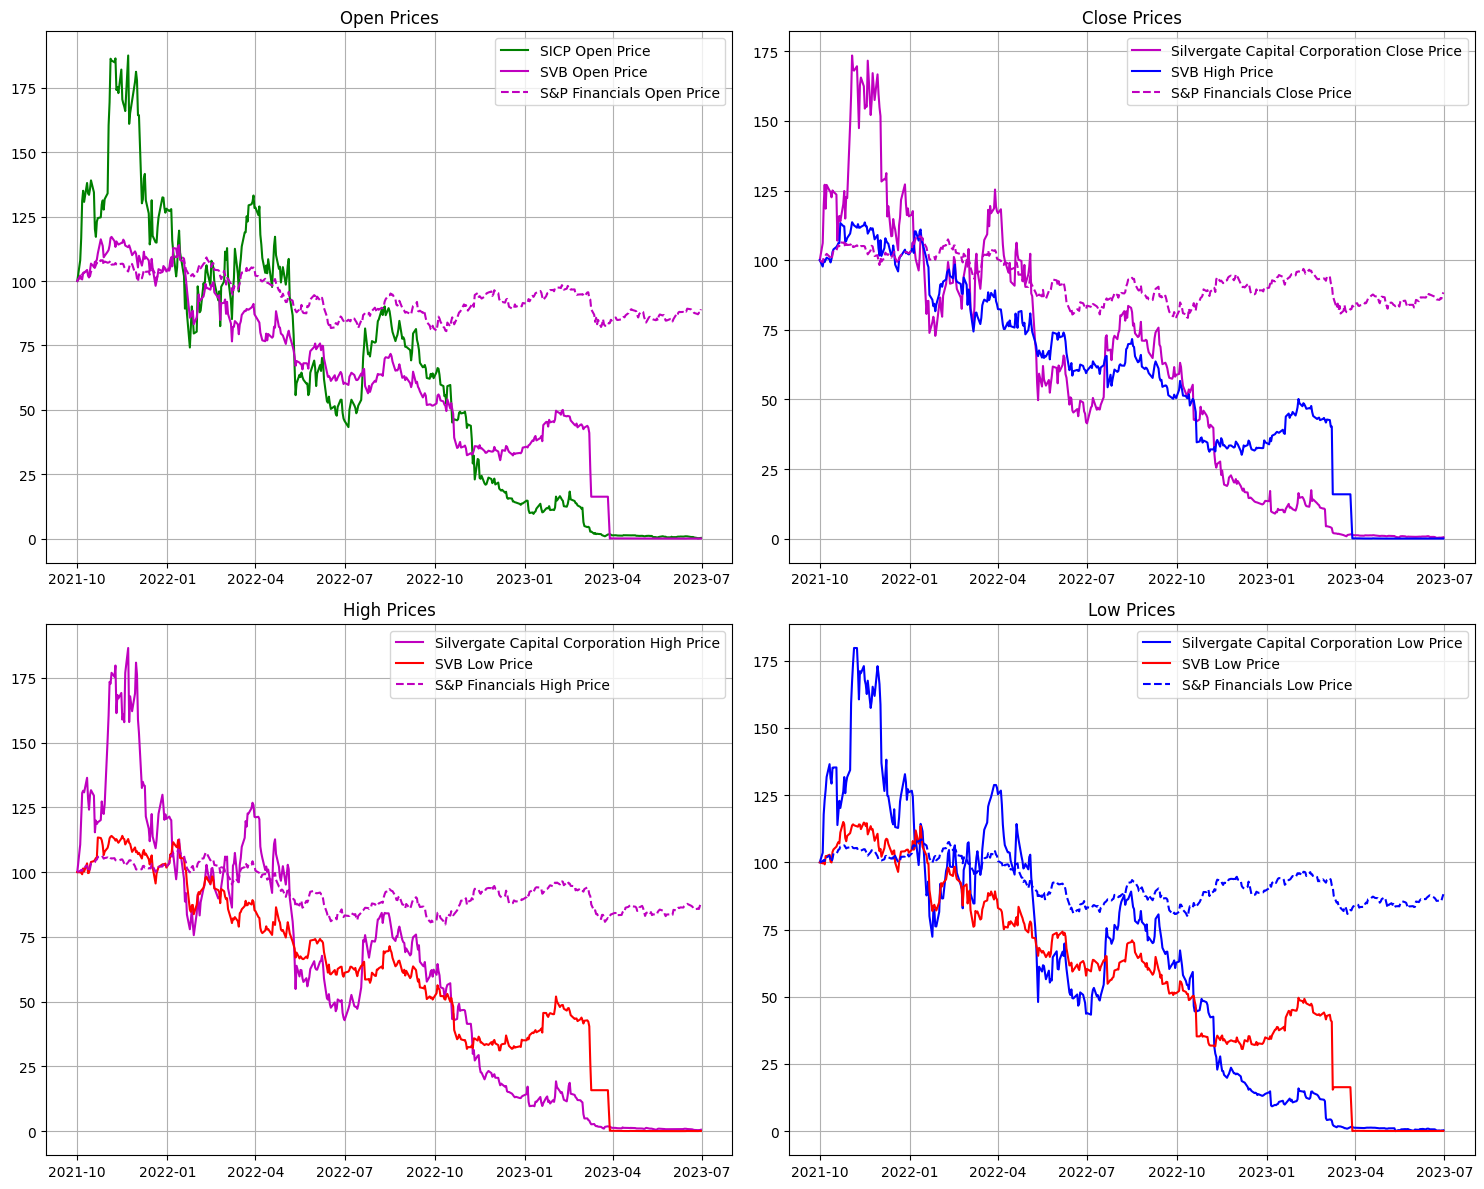

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].plot(sicp_rebased.index, sicp_rebased['Open'], label='SICP Open Price', color='g')
axs[0, 0].plot(svb_rebased.index, svb_rebased['Open'], label='SVB Open Price', color='m')
axs[0, 0].plot(sp_financials_rebased.index, sp_financials_rebased['Open'], label='S&P Financials Open Price', color='m', linestyle='--')
axs[0, 0].set_title('Open Prices')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(sicp_rebased.index, sicp_rebased['Close'], label='Silvergate Capital Corporation Close Price', color='m')
axs[0, 1].plot(svb_rebased.index, svb_rebased['Close'], label='SVB High Price', color='b')
axs[0, 1].plot(sp_financials_rebased.index, sp_financials_rebased['Close'], label='S&P Financials Close Price', color='m', linestyle='--')
axs[0, 1].set_title('Close Prices')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(sicp_rebased.index, sicp_rebased['High'], label='Silvergate Capital Corporation High Price', color='m')
axs[1, 0].plot(svb_rebased.index, svb_rebased['High'], label='SVB Low Price', color='r')
axs[1, 0].plot(sp_financials_rebased.index, sp_financials_rebased['High'], label='S&P Financials High Price', color='m', linestyle='--')
axs[1, 0].set_title('High Prices')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(sicp_rebased.index, sicp_rebased['Low'], label='Silvergate Capital Corporation Low Price', color='b')
axs[1, 1].plot(svb_rebased.index, svb_rebased['Low'], label='SVB Low Price', color='r')
axs[1, 1].plot(sp_financials_rebased.index, sp_financials_rebased['High'], label='S&P Financials Low Price', color='b', linestyle='--')
axs[1, 1].set_title('Low Prices')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [70]:
#align frames
svb_data, sicp_data = svb_data.align(sicp_data, join='inner')

In [71]:
correlations = {}
for column in svb_data.columns:
    correlation = svb_data[column].corr(sicp_data[column])
    correlations[column] = correlation

for feature, correlation in correlations.items():
    print(f'Correlation between {feature} of Stock 1 and Stock 2: {correlation:.4f}')

Correlation between Open of Stock 1 and Stock 2: 0.9307
Correlation between High of Stock 1 and Stock 2: 0.9300
Correlation between Low of Stock 1 and Stock 2: 0.9314
Correlation between Close of Stock 1 and Stock 2: 0.9308
Correlation between Adj Close of Stock 1 and Stock 2: 0.9308
Correlation between Volume of Stock 1 and Stock 2: 0.1665
